In [75]:
%load_ext autoreload
%autoreload 2
import keras
import numpy as np
from graph import *
from encoder import create_encoder
from data_processing import processer
from RepresentationLearner import RepresentationLearner
from compute import *
from GNN import *
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:

num_classes = 10
input_shape = (32, 32, 3)

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


In [44]:
x_data = np.concatenate([x_train, x_test])
y_data = np.concatenate([y_train, y_test])

classes = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck',
]

In [21]:
target_size = 32
representation_dims = 512
projection_units = 128
num_clusters = 28
kn = 5
tune_encoder_during_clustering = False

In [22]:
x_data = x_data.astype('float32')
processer.layers[-1].adapt(x_data)
x_data

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [23]:
encoder = create_encoder(representation_dims)
representation_leaner = RepresentationLearner(
    encoder, projection_units, num_augmentations=2, temperature=0.1
)

lr_scheduler = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=0.001, decay_steps=500, alpha=0.1
)



In [24]:
representation_leaner.compile(
    optimizer=keras.optimizers.AdamW(
        learning_rate=lr_scheduler, weight_decay=0.0001
    ), jit_compile=False
)


In [25]:
history = representation_leaner.fit(
    x=x_data,
    batch_size=512,
    epochs=50
)

Epoch 1/50


I0000 00:00:1747320525.993957    1263 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-05-15 15:48:50.518131: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 8.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-05-15 15:48:50.518197: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 8.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-05-15 15:48:50.518206: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 8.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if m

118/118 ━━━━━━━━━━━━━━━━━━━━ 58s 285ms/step - loss: 158.7963
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 31s 265ms/step - loss: 15.7332
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 31s 263ms/step - loss: 13.8632
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 31s 262ms/step - loss: 12.8877
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 31s 263ms/step - loss: 12.4118
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 32s 268ms/step - loss: 12.1479
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 31s 263ms/step - loss: 11.9296
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 30s 253ms/step - loss: 11.4509
Epoch 9/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 31s 262ms/step - loss: 11.0316
Epoch 10/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 32s 275ms/step - loss: 10.8343
Epoch 11/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 31s 266ms/step - loss: 10.2721
Epoch 12/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 32s 268ms/step - loss: 10.0336
Epoch 13/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 32s 270ms/step - loss: 9.8377
Epoch 14/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 32s 270ms/step - loss: 9.8853
Epoch 15/50
1

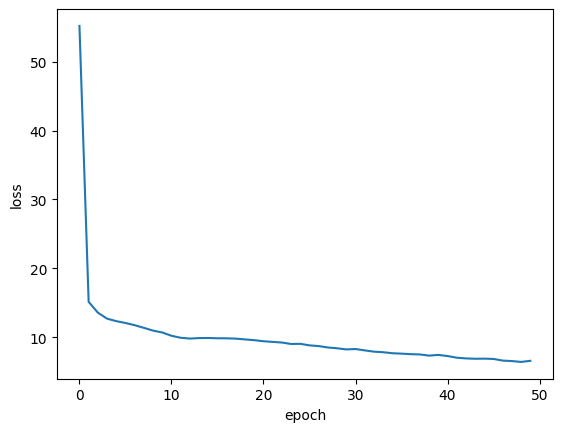

In [26]:
from graph import loss_graph, display_learning_curves

loss_graph(history.history['loss'])

In [66]:
knns = compute_knn(representation_leaner.encoder.predict(x_data), 512, kn)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step


100%|██████████| 117/117 [00:04<00:00, 26.68it/s]


In [28]:
knns

array([[38956, 34910, 59951,  5867, 16326],
       [38956, 34910, 59951,  5867, 16326],
       [38956, 34910, 59951,  5867,  4110],
       ...,
       [38956, 34910, 59951,  5867, 16326],
       [38956, 34910, 59951,  5867, 16326],
       [38956, 34910, 59951,  5867, 16326]], dtype=int32)

In [29]:
projection = representation_leaner.predict(x_data)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step


In [30]:
projection

array([[0.        , 0.53446424, 0.13451743, ..., 0.        , 0.2981295 ,
        0.33946764],
       [0.16152301, 0.04982811, 0.3882391 , ..., 0.20807259, 0.00997014,
        0.        ],
       [0.00915898, 0.20708808, 0.04230197, ..., 0.09944665, 0.09696525,
        0.12526195],
       ...,
       [0.07625674, 0.03318556, 0.04903565, ..., 0.37766832, 0.        ,
        0.        ],
       [0.13786912, 0.        , 0.25618193, ..., 0.23169202, 0.1024518 ,
        0.00683962],
       [0.1684368 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.4570431 ]], dtype=float32)

In [57]:
hidden_units = [5, 128]
dropout_rate = 0.5
baseline_model = create_baseline_model(hidden_units, num_classes, dropout_rate)

In [58]:
baseline_model.summary()

Model: "baseline_model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_features      │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ffn_block1          │ (None, 128)       │        838 │ input_features[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ffn_block2          │ (None, 128)       │      1,945 │ ffn_block1[0][0]  │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ skip_connection2    │ (None, 128)       │          0 │ ffn_block1[0][0], │
│ (Add)               │                   │            │ ffn_block2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ffn_block3          │ (None, 128)       │      1,945 │ skip_connection2… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ skip_connection3    │ (None, 128)       │          0 │ skip_connection2… │
│ (Add)               │                   │            │ ffn_block3[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ffn_block4          │ (None, 128)       │      1,945 │ skip_connection3… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ skip_connection4    │ (None, 128)       │          0 │ skip_connection3… │
│ (Add)               │                   │            │ ffn_block4[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ffn_block5          │ (None, 128)       │      1,945 │ skip_connection4… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ skip_connection5    │ (None, 128)       │          0 │ skip_connection4… │
│ (Add)               │                   │            │ ffn_block5[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ logits (Dense)      │ (None, 10)        │      1,290 │ skip_connection5… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 9,908 (38.70 KB)

 Trainable params: 8,824 (34.47 KB)

 Non-trainable params: 1,084 (4.23 KB)

In [67]:
hidden_units = [5, 128]
learning_rate = 0.001
dropout_rate = 0.5
num_epochs = 300
batch_size = 256
def run_model(model, x_train, y_train):
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'],
    )

    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_accuracy', patience=50, restore_best_weights=True
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.15,
        callbacks=[early_stopping]
    )
    return history

In [46]:
knns.shape

(59904, 5)

In [37]:
projection.shape

(120000, 128)

In [ ]:
%%sql


In [70]:
knns = knns.astype('float32') / 255.

In [69]:
knns.shape

(59904, 5)

In [77]:
num_features = 512

history = run_model(baseline_model, projection, knns)

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 102000
'y' sizes: 59904


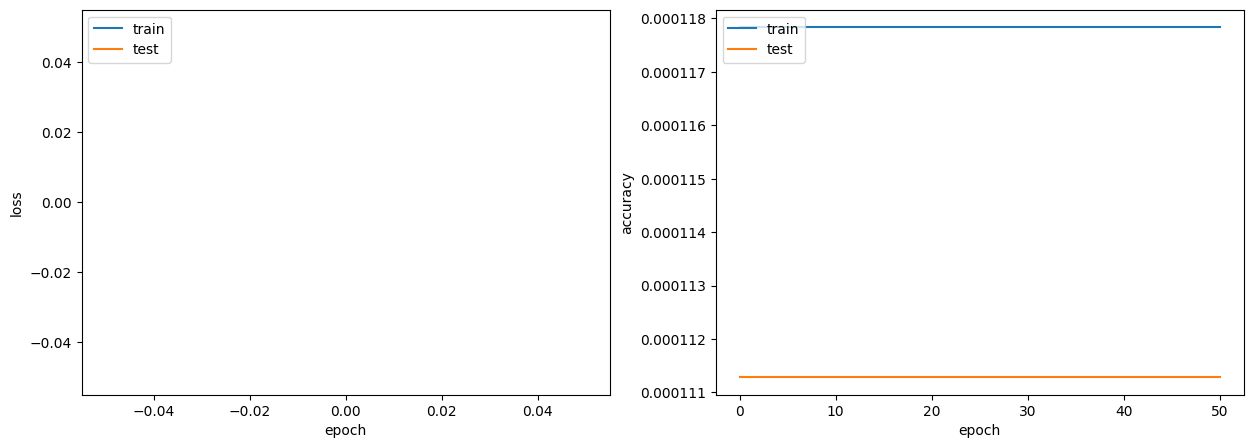

In [76]:
display_learning_curves(history)